 # Status generation

## 1. Load status data
Source: https://bestat.statbel.fgov.be/bestat/crosstable.xhtml?view=4e056039-dc63-4942-9dfb-de3d503da9c0

In [1]:
data <- read.csv("../datasets/repartition_status.csv", header=TRUE)

# Filling missing values
data$Pop[is.na(data$Pop)] <- 0
data <- na.omit(data)

## 2. Plot status data

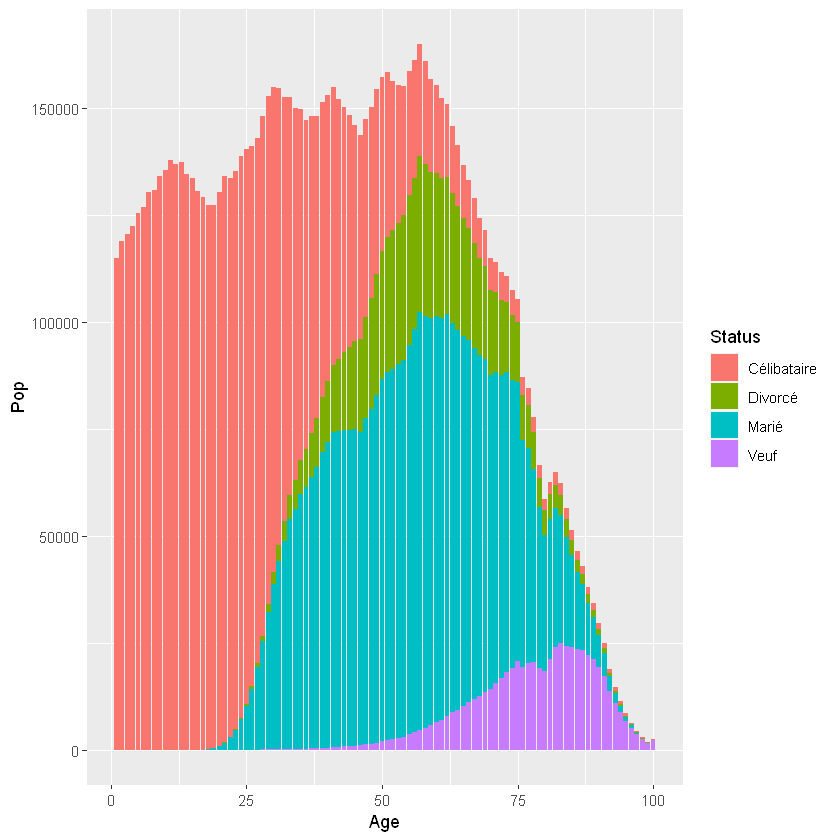

In [2]:
library(ggplot2)
data$Status <- factor(data$Status)
ggplot(data, aes(x = Age, y = Pop, fill = Status)) + geom_bar(stat="identity")

## 3. Get status probability per age

In [4]:
age_status_prob <- list()
for (age in unique(data$Age)) {
  subset_data <- data[data$Age == age, ]
  age_prob <- subset_data$Pop / sum(subset_data$Pop)
  age_status_prob[[as.character(age)]] <- age_prob
}

## 4. Generate new status

In [17]:
data <- read.csv("../workingsets/temp_age_gender.csv", header=TRUE)
statuses <- c("Single", "Married", "Widowed", "Divorced")

age <- as.numeric(data$age)

new_statuses <- lapply(seq_len(length(age)), function(i) {
  prob <- age_status_prob[[as.character(age[i])]]
  sample(statuses, size = 1, replace = TRUE, prob = unlist(prob))
})

In [19]:
new_ages_genders_statuses <- data.frame(age = data$age, gender = data$sex, status = unlist(new_statuses))
write.csv(new_ages_genders_statuses, file = "../workingsets/temp_age_gender_status.csv")